<font color="#CA3532"><h1 align="left">Inteligencia Artificial Aplicada a la Bolsa (MIAX-13)</h1></font>
<font color="#5b5a59"><h2 align="left">Extensión del modelo de regresión logística a una dimensión arbitraria</h2></font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Definición de la función sigmoide:

In [2]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

Cross-entropy loss:

In [3]:
def cross_entropy(y, t):
    loss = np.mean(-t*np.log(y) - (1.-t)*np.log(1.-y))
    return loss

Cross-entropy loss, from logits:

In [6]:
def cross_entropy_from_logits(z, t):
    a = np.log(1. + np.exp(-z))
    loss = np.mean(a + z - t*z)
    return loss

Precisión:

In [7]:
def accuracy(y, t):
    pred = y > 0.5
    return np.mean(pred == t)

Generación de los datos del problema:

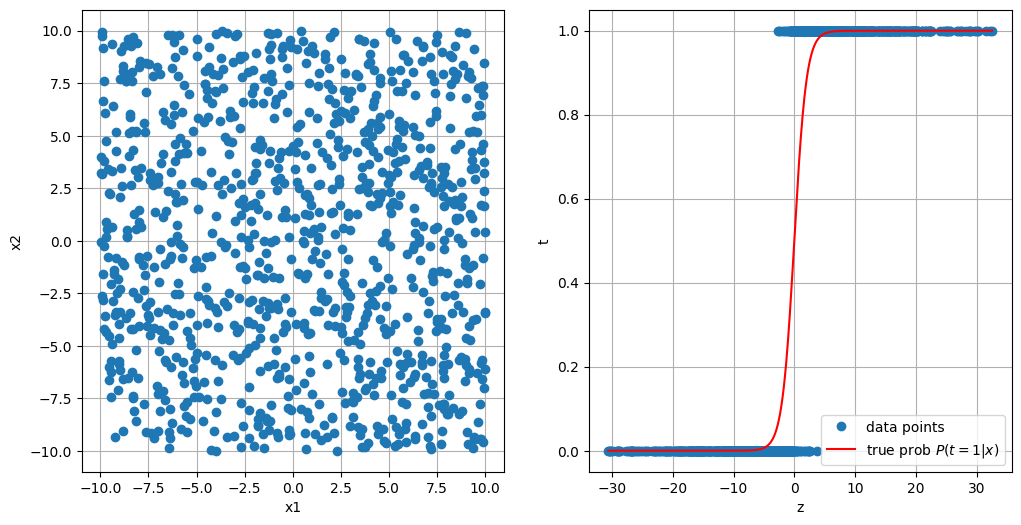

Cross-entropy esperada = 0.097119
Cross-entropy esperada (logits) = 0.097119
Accuracy esperada = 0.962000


In [8]:
# Parametros:
d = 5 # Dimension del problema
w = np.random.randn(d, 1)
b = 0.0
xmin = -10.0
xmax = 10.0
noise = 1.0
n = 1000

# Datos del problema generados al azar:
x = xmin + np.random.rand(d, n)*(xmax - xmin)
z = np.dot(w.T, x) + b
zmin = np.min(z)
zmax = np.max(z)
t0 = sigmoid(z)
t = 1*(t0 > np.random.rand(n))

# Distribucion de las dos primeras variables:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(x[0,:], x[1,:], 'o')
plt.grid(True)
plt.xlabel("x1")
plt.ylabel("x2")
plt.subplot(122)

# Grafica de t frente a z:
zrange = np.arange(zmin, zmax, 0.1)
plt.plot(z[0], t[0], 'o', label='data points')
plt.plot(zrange, sigmoid(zrange), 'r-', label='true prob $P(t = 1 | x)$')
plt.grid(True)
plt.xlabel("z")
plt.ylabel("t")
plt.legend()
plt.show()

# Coste esperado:
loss = cross_entropy(t0, t)
print("Cross-entropy esperada = %f" % loss)
loss = cross_entropy_from_logits(z, t)
print("Cross-entropy esperada (logits) = %f" % loss)

# Accuracy:
acc = accuracy(t0, t)
print("Accuracy esperada = %f" % acc)

Forma de los vectores:

In [9]:
print(x.shape)
print(t.shape)

(5, 1000)
(1, 1000)


Modelo de regresión logística con los parámetros inicializados al azar:

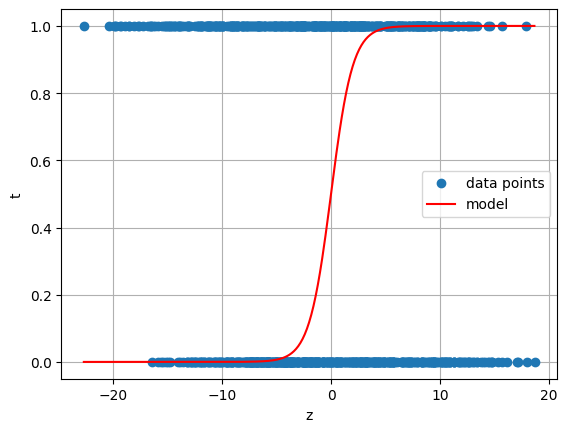

Cross-entropy = 3.495365
Accuracy = 0.513000


In [16]:
w = np.random.randn(d, 1)
b = np.random.randn()

# Aplico el modelo a los datos y comparo la prediccion y con el objetivo t:
z = np.dot(w.T, x) + b
zmin = np.min(z)
zmax = np.max(z)
y = sigmoid(z)

# Grafica de y frente a z:
zrange = np.arange(zmin, zmax, 0.1)
plt.plot(z[0], t[0], 'o', label='data points')
plt.plot(zrange, sigmoid(zrange), 'r-', label='model')
plt.grid(True)
plt.xlabel("z")
plt.ylabel("t")
plt.legend()
plt.show()

# Coste:
loss = cross_entropy_from_logits(z, t)
print("Cross-entropy = %f" % loss)

# Accuracy:
acc = accuracy(y, t)
print("Accuracy = %f" % acc)

Entrenamiento del modelo:

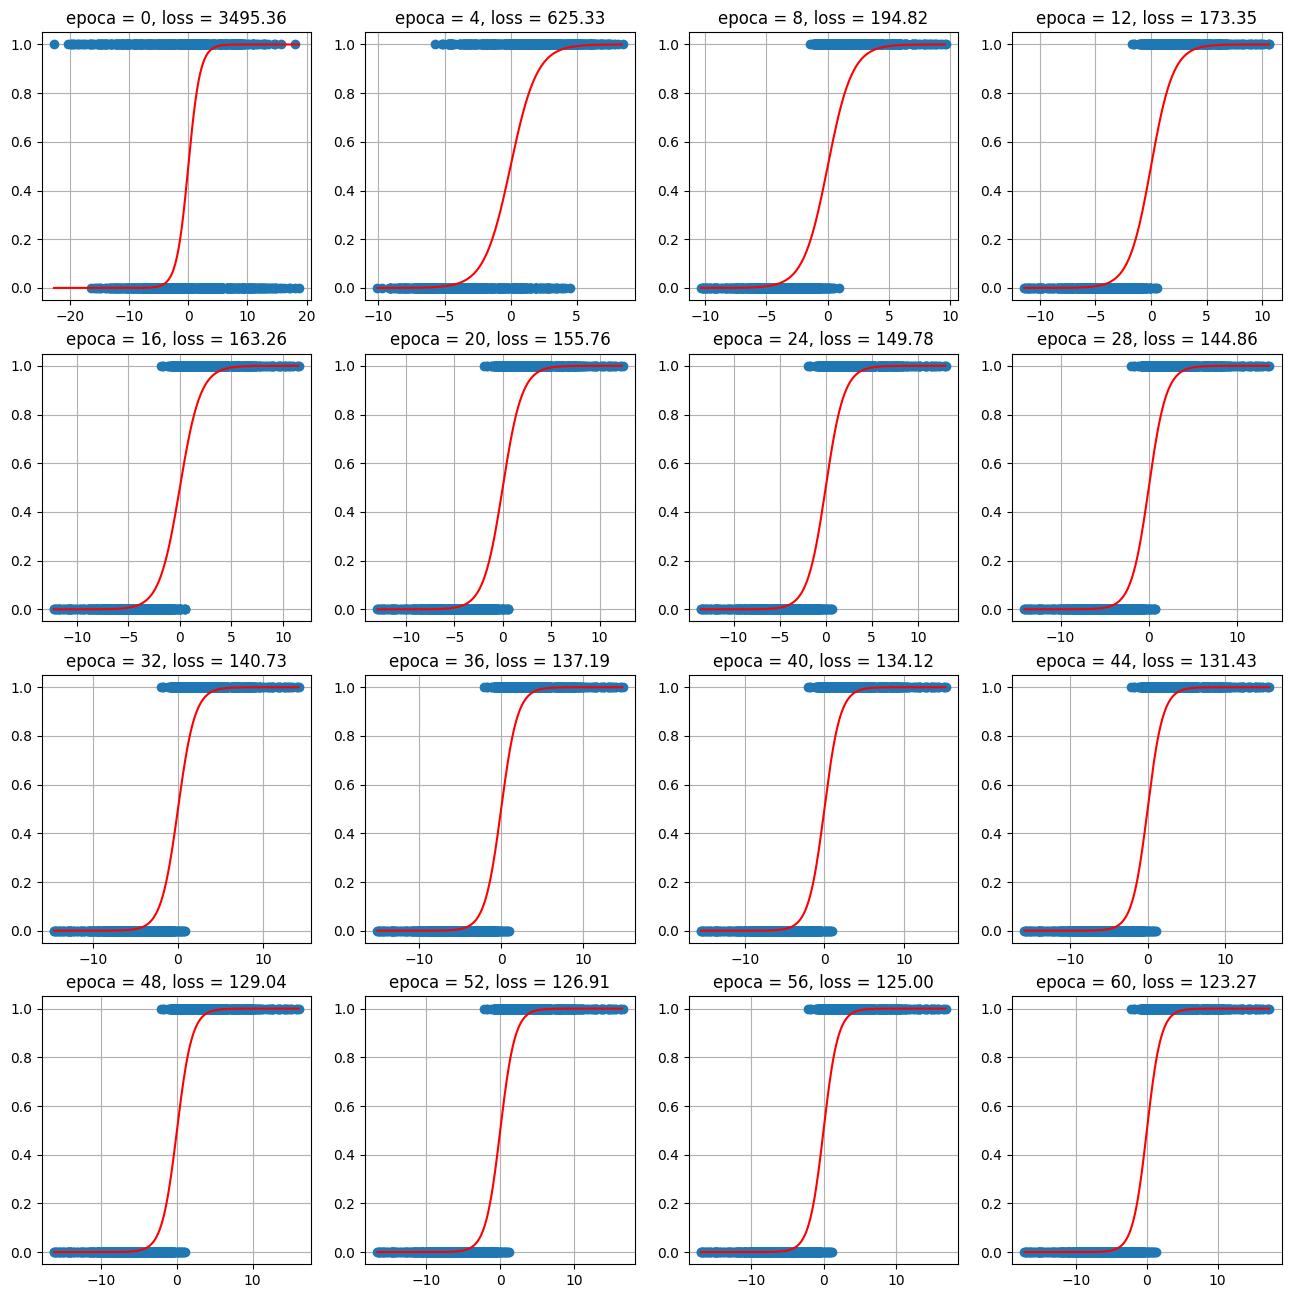

In [17]:
nepocas = 64
eta = 0.0001

plt.figure(figsize=(16,16))

k = 1
loss = []
acc = []
for i in range(nepocas):
    z = np.dot(w.T, x) + b
    zmin = np.min(z)
    zmax = np.max(z)
    y = sigmoid(z)

    #----------------------------------------------------------
    # TO-DO: Calcula el coste cross-entropy y la precision (acc),
    # y añadelos a las listas loss y acc:
    e = -(t * np.log(y+1e-16) + (1 - t) * np.log(1-y+1e-16)).sum()
    a = ((y > 0.5) == t).mean()
    loss.append(e)
    acc.append(a)
    #----------------------------------------------------------

    if i%4 == 0:
        zrange = np.arange(zmin, zmax, 0.1)
        plt.subplot(4, 4, k)
        plt.plot(z[0], t[0], 'o')
        plt.plot(zrange, sigmoid(zrange), 'r-')
        plt.grid(True)
        plt.title("epoca = %d, loss = %.2f" % (i, loss[-1]))
        k += 1

   #----------------------------------------------------------
    # TO-DO: Calcula los gradientes y actualiza los parametros:
    dL_dz = (y-t)
    dz_dw = x
    dz_db = 1
    dL_dw = (dL_dz @ dz_dw.T).T
    dL_db = dL_dz.sum()
    b = b - eta * dL_db
    w = w - eta * dL_dw
    #----------------------------------------------------------

plt.show()

Cross-entropy y accuracy frente a número de épocas:

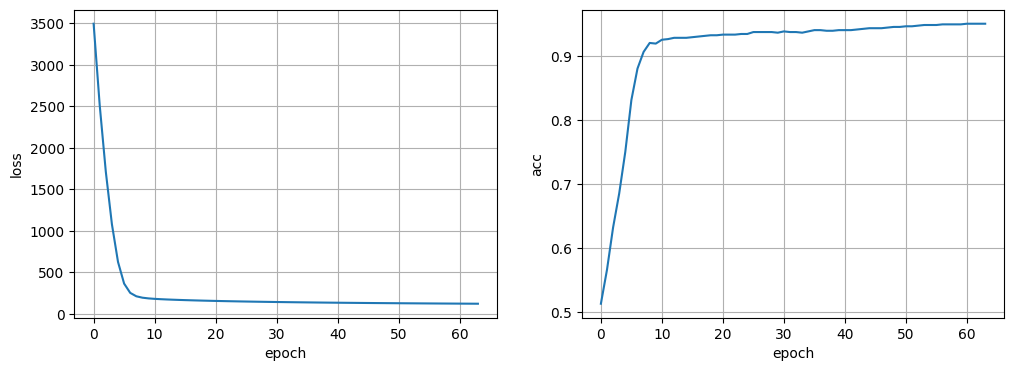

In [18]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(range(nepocas), loss)
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("loss")

plt.subplot(1,2,2)
plt.plot(range(nepocas), acc)
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("acc")
plt.show()

In [19]:
loss[-1]

np.float64(122.07528110410439)

In [20]:
acc[-1]

np.float64(0.95)

# Breast Cancer Wisconsin

In [21]:
from sklearn.datasets import load_breast_cancer

In [22]:
data = load_breast_cancer()

In [23]:
x = data.data
t = data.target[:, None]

print(x.shape)
print(t.shape)

(569, 30)
(569, 1)


La clase $t$ toma dos posibles valores (0 y 1):

In [24]:
print(np.unique(t))
print(np.sum(t == 0))
print(np.sum(t == 1))

[0 1]
212
357


Vamos a construir un modelo de regresión logística para predecir la variable $t$ a partir de los atributos $x$.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# Particion entrenamiento-test:
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.33, random_state=42)
x_train = x_train
x_test = x_test
t_train = t_train
t_test = t_test

In [27]:
print(x_train.shape)
print(x_test.shape)
print(t_train.shape)
print(t_test.shape)

(381, 30)
(188, 30)
(381, 1)
(188, 1)


In [28]:
# Estandarizar los datos
media = x_train.mean(axis=0, keepdims=True)
std = x_train.std(axis=0, keepdims=True)

x_train = (x_train - media) / std
x_test = (x_test - media) / std # Se estandariza con la media y std de training

In [30]:
d = x_train.shape[1]

w = np.random.randn(d, 1)
b = np.random.randn()

In [31]:
w.shape, x.shape

((30, 1), (569, 30))

In [34]:
# Entrenamiento del modelo:

d = x_train.shape[1]

w = np.random.randn(d, 1)
b = np.random.randn()

nepocas = 400
eta = 0.0001

k = 1
loss_train = []
acc_train = []
loss_test = []
acc_test = []
for i in range(nepocas):
    z_train = np.dot(x_train, w) + b
    y_train = sigmoid(z_train)

    z_test = np.dot(x_test, w) + b
    y_test = sigmoid(z_test)

    # TO-DO Calcula cross-entropy y accuracy en training
    e_train = -(t_train * np.log(y_train+1e-16) + (1 - t_train) * np.log(1-y_train+1e-16)).sum()
    a_train = ((y_train > 0.5) == t_train).mean()

    loss_train.append(e_train)
    acc_train.append(a_train)

    # TO-DO Calcula cross-entropy y accuracy en test
    e_test =  -(t_test * np.log(y_test+1e-16) + (1 - t_test) * np.log(1-y_test+1e-16)).sum()
    a_test =  ((y_test > 0.5) == t_test).mean()

    loss_test.append(e_test)
    acc_test.append(a_test)

    # TO-DO Calcula los gradientes y actualiza los parametros
    dL_dz = (y_train-t_train)
    dz_dw = x_train
    dz_db = 1
    dL_dw = (dL_dz.T @ dz_dw).T
    dL_db = dL_dz.sum()
    b = b - eta * dL_db
    w = w - eta * dL_dw

In [33]:
dL_dz.shape, dz_dw.shape

((381, 1), (381, 30))

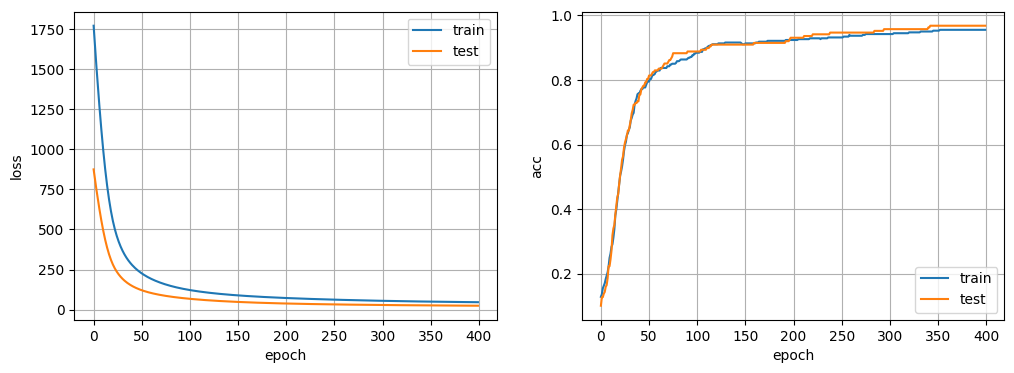

In [35]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(nepocas), loss_train, label="train")
plt.plot(range(nepocas), loss_test, label="test")
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(nepocas), acc_train, label="train")
plt.plot(range(nepocas), acc_test, label="test")
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("acc")
plt.legend()
plt.show()

In [36]:
acc_test[-1]

np.float64(0.9680851063829787)

## Reducción de dimensionalidad con PCA

Principal Component Analysis (PCA) es un método estadístico que permite simplificar la complejidad reduciendo la dimensión de un problema mediante un método lineal.

In [37]:
from sklearn.decomposition import PCA

Primero podemos analizar la información que se pierde al transformar el conjunto de datos a un espacio de menor dimensión. Para ello creamos un PCA y analizamos su ratio de varianza explicada.

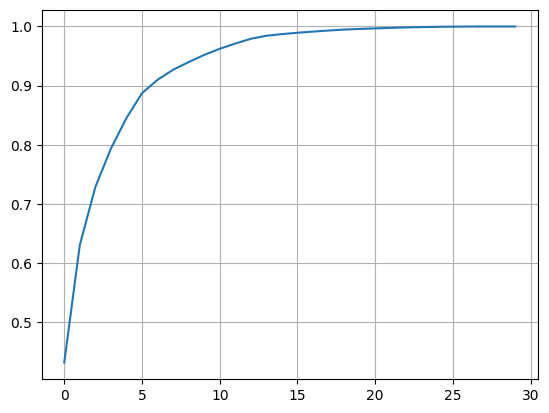

In [40]:
pca = PCA()
pca.fit(x_train)
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.grid()
plt.show()

Se ajusta la transformación indicando el número de dimensiones a la que queremos reducir. Usamos el parámetro *n_components*.

In [41]:
pca = PCA(n_components=10)
pca.fit(x_train)
print(1 - pca.explained_variance_ratio_[-1]) # Con 10 dimensiones tenemos un 98.78% de la información

0.9878849046501088


Transformamos los datos de training y test a las 10 dimensiones.

In [42]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [43]:
x_train_pca.shape

(381, 10)

Entrenamos el modelo.

In [44]:
# Entrenamiento del modelo:

d = x_train_pca.shape[1]

w = np.random.randn(d, 1)
b = np.random.randn()

nepocas = 400
eta = 0.0001

k = 1
loss_train = []
acc_train = []
loss_test = []
acc_test = []
for i in range(nepocas):
    z_train = np.dot(x_train_pca, w) + b
    y_train = sigmoid(z_train)

    z_test = np.dot(x_test_pca, w) + b
    y_test = sigmoid(z_test)

    # TO-DO Calcula cross-entropy y accuracy en training
    e_train = -(t_train * np.log(y_train+1e-16) + (1 - t_train) * np.log(1-y_train+1e-16)).sum()
    a_train = ((y_train > 0.5) == t_train).mean()

    loss_train.append(e_train)
    acc_train.append(a_train)

    # TO-DO Calcula cross-entropy y accuracy en test
    e_test =  -(t_test * np.log(y_test+1e-16) + (1 - t_test) * np.log(1-y_test+1e-16)).sum()
    a_test =  ((y_test > 0.5) == t_test).mean()

    loss_test.append(e_test)
    acc_test.append(a_test)

    # TO-DO Calcula los gradientes y actualiza los parametros
    dL_dz = (y_train-t_train)
    dz_dw = x_train_pca
    dz_db = 1
    dL_dw = (dL_dz.T @ dz_dw).T
    dL_db = dL_dz.sum()
    b = b - eta * dL_db
    w = w - eta * dL_dw

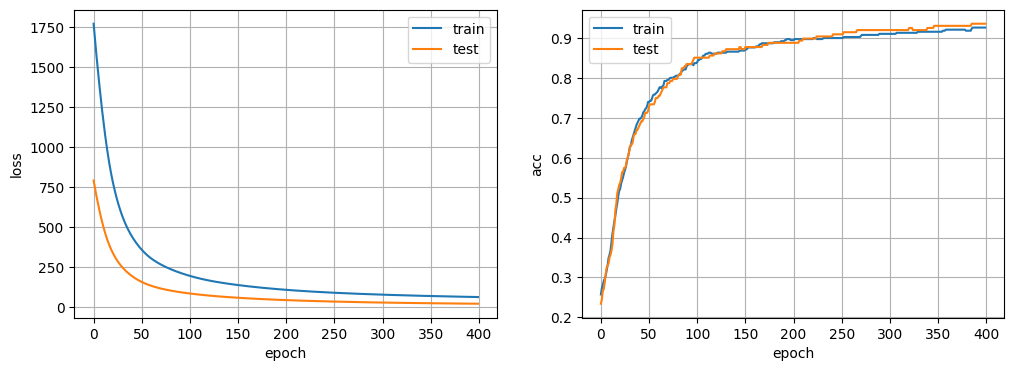

In [45]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(nepocas), loss_train, label="train")
plt.plot(range(nepocas), loss_test, label="test")
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(nepocas), acc_train, label="train")
plt.plot(range(nepocas), acc_test, label="test")
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("acc")
plt.legend()
plt.show()

In [46]:
acc_test[-1]

np.float64(0.9361702127659575)

## Extraer la frontera de decisión de un modelo en 2D

En este caso, vamos a reducir mediante PCA la dimensión de los datos a 2D para dibujar la frontera de decisión del modelo.

In [47]:
pca = PCA(n_components=2)
pca.fit(x_train)
print(1 - pca.explained_variance_ratio_[-1]) # Con 2 dimensiones tenemos un 80.15% de la información

0.8014652495417764


Transformamos los datos de training y test a 2D.

In [48]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

Entrenamos el modelo.

In [49]:
# Entrenamiento del modelo:

d = x_train_pca.shape[1]

w = np.random.randn(d, 1)
b = np.random.randn()

nepocas = 400
eta = 0.0001

k = 1
loss_train = []
acc_train = []
loss_test = []
acc_test = []
for i in range(nepocas):
    z_train = np.dot(x_train_pca, w) + b
    y_train = sigmoid(z_train)

    z_test = np.dot(x_test_pca, w) + b
    y_test = sigmoid(z_test)

    # TO-DO Calcula cross-entropy y accuracy en training
    e_train = -(t_train * np.log(y_train+1e-16) + (1 - t_train) * np.log(1-y_train+1e-16)).sum()
    a_train = ((y_train > 0.5) == t_train).mean()

    loss_train.append(e_train)
    acc_train.append(a_train)

    # TO-DO Calcula cross-entropy y accuracy en test
    e_test =  -(t_test * np.log(y_test+1e-16) + (1 - t_test) * np.log(1-y_test+1e-16)).sum()
    a_test =  ((y_test > 0.5) == t_test).mean()

    loss_test.append(e_test)
    acc_test.append(a_test)

    # TO-DO Calcula los gradientes y actualiza los parametros
    dL_dz = (y_train-t_train)
    dz_dw = x_train_pca
    dz_db = 1
    dL_dw = (dL_dz.T @ dz_dw).T
    dL_db = dL_dz.sum()
    b = b - eta * dL_db
    w = w - eta * dL_dw

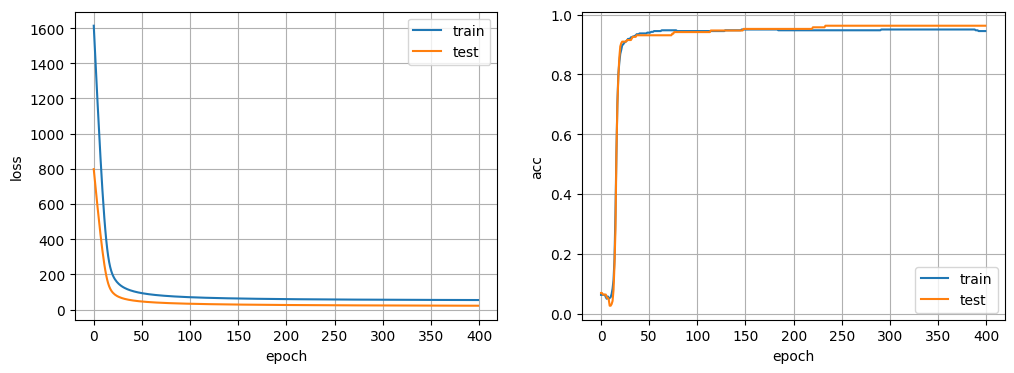

In [50]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(nepocas), loss_train, label="train")
plt.plot(range(nepocas), loss_test, label="test")
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(nepocas), acc_train, label="train")
plt.plot(range(nepocas), acc_test, label="test")
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("acc")
plt.legend()
plt.show()

In [51]:
acc_test[-1]

np.float64(0.9627659574468085)

Para dibujar la frontera de decisión en 2D, se calcula una malla con la función *meshgrid* de numpy. Esta función de da los pares de puntos a imprimir en un plot con la función *contourf*. Además, hay que calcular el valor de cada punto, por lo que hay que procesarlos con el modelo ya entrenado.

In [52]:
xx, yy = np.meshgrid(np.arange(x_train_pca[:, 0].min()-1, x_train_pca[:, 0].max()+1, 0.1),
                     np.arange(x_train_pca[:, 1].min()-1, x_train_pca[:, 1].max()+1, 0.1))
xy = np.concatenate([xx.reshape([1, -1]), yy.reshape([1, -1])],axis=0).T
xy.shape

(51493, 2)

In [53]:
z = sigmoid(xy @ w + b)
z.shape

(51493, 1)

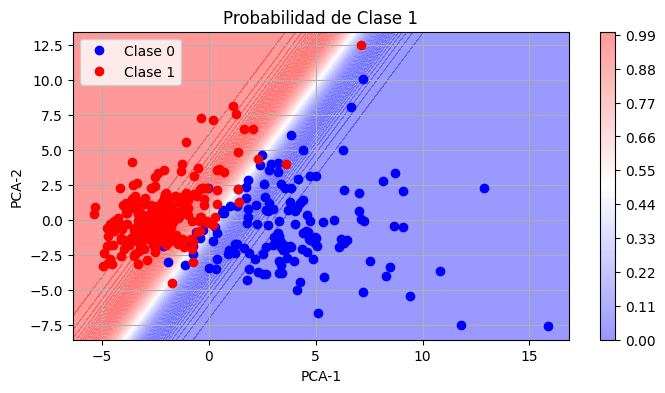

In [54]:
plt.figure(figsize=(8, 4))

plt.contourf(xx, yy, z[:, 0].reshape(xx.shape), 100, cmap="bwr", alpha=0.4, vmin=0.0, vmax=1.0)

plt.plot(x_train_pca[t_train.ravel()==0, 0], x_train_pca[t_train.ravel()==0, 1], 'o', label="Clase 0", color='blue')
plt.plot(x_train_pca[t_train.ravel()==1, 0], x_train_pca[t_train.ravel()==1, 1], 'o', label="Clase 1", color='red')

plt.title("Probabilidad de Clase 1")
plt.xlabel("PCA-1")
plt.ylabel("PCA-2")
plt.grid(True)
plt.legend(loc=2)
plt.colorbar()
plt.show()

# Iris dataset

Este problema sencillo que ya conocéis consiste en clasificar plantas de la especie Iris en tres subespecies: virgínica, setosa y versicolor. Los atributos que describen cada planta son las dimensiones (longitud y anchura) del pétalo y sépalo.

En este enlace tenéis una descripción de los datos:
https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset

In [55]:
from sklearn.datasets import load_iris
iris = load_iris()

Preparación de los datos considerando exclusivamente las dos últimas dimensiones del problema (longitud y anchura del pétalo). Esto nos permite visualizar el modelo en 2D.

In [56]:
x = iris.data[:, -2:]
t = iris.target
[n, d] = x.shape

Los datos del problema están ordenados. Para evitar sesgos conviene desordenarlos.

In [57]:
p = np.random.permutation(n)
x = x[p, :]
t = t[p]
t = t[:, None]
print(x.shape, t.shape)

(150, 2) (150, 1)


Ahora imprimimos los datos en 2D. Se puede ver que los dos atributos seleccionados distinguen relativamente bien las tres clases.

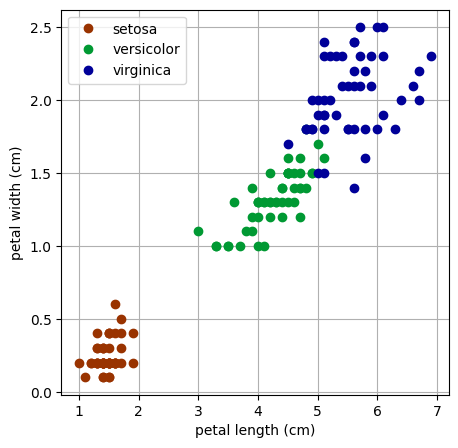

In [58]:
plt.figure(figsize=(5, 5))

plt.plot(x[t.ravel()==0, 0], x[t.ravel()==0, 1], 'o', label=iris.target_names[0], color='#993300')
plt.plot(x[t.ravel()==1, 0], x[t.ravel()==1, 1], 'o', label=iris.target_names[1], color='#009933')
plt.plot(x[t.ravel()==2, 0], x[t.ravel()==2, 1], 'o', label=iris.target_names[2], color='#000099')

plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.grid(True)

plt.legend(loc=2)
plt.show()

Separamos el dataset en training-test para preparar los datos de los ejercicios:

In [59]:
# Particion entrenamiento-test:
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.33, random_state=42)
x_train = x_train
x_test = x_test
t_train = t_train
t_test = t_test

In [60]:
print(x_train.shape)
print(x_test.shape)
print(t_train.shape)
print(t_test.shape)

(100, 2)
(50, 2)
(100, 1)
(50, 1)


In [61]:
medias = x_train.mean(axis=0, keepdims=True)
stds = x_train.std(axis=0, keepdims=True)

x_train = (x_train - medias) / stds
x_test = (x_test - medias) / stds

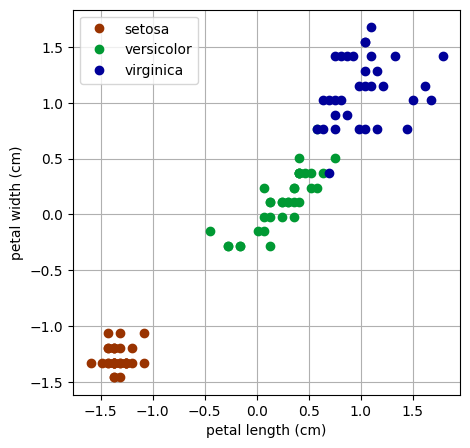

In [63]:
plt.figure(figsize=(5, 5))

plt.plot(x_train[t_train.ravel()==0, 0], x_train[t_train.ravel()==0, 1], 'o', label=iris.target_names[0], color='#993300')
plt.plot(x_train[t_train.ravel()==1, 0], x_train[t_train.ravel()==1, 1], 'o', label=iris.target_names[1], color='#009933')
plt.plot(x_train[t_train.ravel()==2, 0], x_train[t_train.ravel()==2, 1], 'o', label=iris.target_names[2], color='#000099')

plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.grid(True)

plt.legend(loc=2)
plt.show()

## Ejercicio 1

1.1. Crear un modelo de regresión logística que aprenda a diferenciar la subespecie setosa de las demás subespecies del dataset.

1.2. Visualizar la frontera de decisión del modelo.


In [64]:
clase_setosa = np.where(iris.target_names == 'setosa')[0][0]
clase_setosa

np.int64(0)

In [65]:
x_train_e1 = x_train
x_test_e1 = x_test

# Tenemos que quedarnos con la clase setosa como clase target (1) y el resto reetiquetarlas como no-target (0).
t_train_e1 = (t_train == clase_setosa) * 1
t_test_e1 = (t_test == clase_setosa) * 1

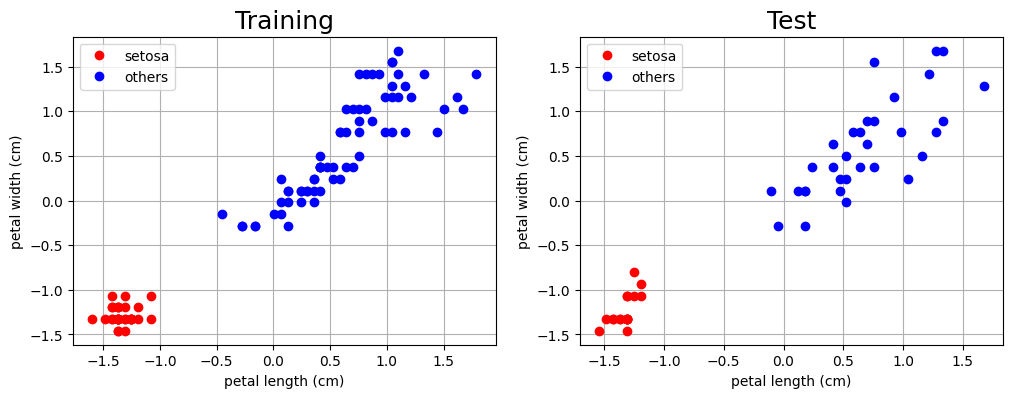

In [66]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.title("Training", size=18)
plt.plot(x_train_e1[(t_train_e1==1)[:, 0], 0], x_train_e1[(t_train_e1==1)[:, 0], 1], 'o', label=iris.target_names[0], color='red')
plt.plot(x_train_e1[(t_train_e1==0)[:, 0], 0], x_train_e1[(t_train_e1==0)[:, 0], 1], 'o', label="others", color='blue')
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.grid(True)
plt.legend(loc=2)

plt.subplot(1,2,2)
plt.title("Test", size=18)
plt.plot(x_test_e1[(t_test_e1==1)[:, 0], 0], x_test_e1[(t_test_e1==1)[:, 0], 1], 'o', label=iris.target_names[0], color='red')
plt.plot(x_test_e1[(t_test_e1==0)[:, 0], 0], x_test_e1[(t_test_e1==0)[:, 0], 1], 'o', label="others", color='blue')
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.grid(True)
plt.legend(loc=2)
plt.show()

In [67]:
# TO-DO Entrenamiento del modelo:

d = x_train_e1.shape[1]

w = np.random.randn(d, 1)
b = np.random.randn()

nepocas = 500
eta = 0.001

k = 1
loss_train = []
acc_train = []
loss_test = []
acc_test = []
for i in range(nepocas):
    z_train = np.dot(x_train_e1, w) + b
    y_train = sigmoid(z_train)

    z_test = np.dot(x_test_e1, w) + b
    y_test = sigmoid(z_test)

    # TO-DO Calcula cross-entropy y accuracy en training
    e_train = -(t_train_e1 * np.log(y_train+1e-16) + (1 - t_train_e1) * np.log(1-y_train+1e-16)).sum()
    a_train = ((y_train > 0.5) == t_train_e1).mean()

    loss_train.append(e_train)
    acc_train.append(a_train)

    # TO-DO Calcula cross-entropy y accuracy en test
    e_test =  -(t_test_e1 * np.log(y_test+1e-16) + (1 - t_test_e1) * np.log(1-y_test+1e-16)).sum()
    a_test =  ((y_test > 0.5) == t_test_e1).mean()

    loss_test.append(e_test)
    acc_test.append(a_test)

    # TO-DO Calcula los gradientes y actualiza los parametros
    dL_dz = (y_train-t_train_e1)
    dz_dw = x_train_e1
    dz_db = 1
    dL_dw = (dL_dz.T @ dz_dw).T
    dL_db = dL_dz.sum()
    b = b - eta * dL_db
    w = w - eta * dL_dw

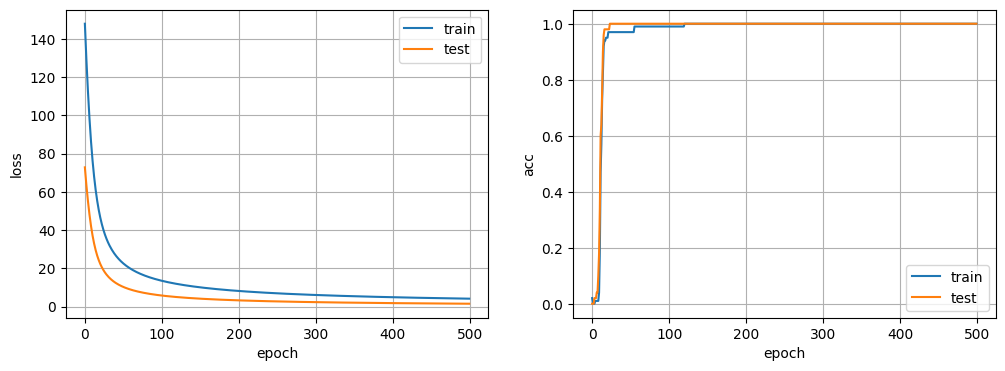

In [68]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(nepocas), loss_train, label="train")
plt.plot(range(nepocas), loss_test, label="test")
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(nepocas), acc_train, label="train")
plt.plot(range(nepocas), acc_test, label="test")
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("acc")
plt.legend()
plt.show()

In [69]:
acc_test[-1]

np.float64(1.0)

In [70]:
xx, yy = np.meshgrid(np.arange(x_train_e1[:, 0].min()-1, x_train_e1[:, 0].max()+1, 0.1),
                     np.arange(x_train_e1[:, 1].min()-1, x_train_e1[:, 1].max()+1, 0.1))
xy = np.concatenate([xx.reshape([1, -1]), yy.reshape([1, -1])],axis=0).T
xy.shape

(2808, 2)

In [71]:
z = sigmoid(xy @ w + b)
z.shape

(2808, 1)

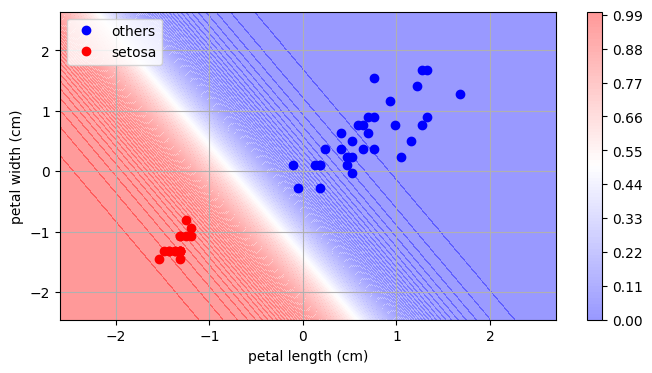

In [72]:
plt.figure(figsize=(8, 4))

plt.contourf(xx, yy, z[:, 0].reshape(xx.shape), 100, cmap="bwr", alpha=0.4, vmin=0.0, vmax=1.0)

plt.plot(x_test_e1[t_test_e1.ravel()==0, 0], x_test_e1[t_test_e1.ravel()==0, 1], 'o', label="others", color='blue')
plt.plot(x_test_e1[t_test_e1.ravel()!=0, 0], x_test_e1[t_test_e1.ravel()!=0, 1], 'o', label='setosa', color='red')

plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.grid(True)
plt.legend(loc=2)
plt.colorbar()
plt.show()

## Ejercicio 2

2.1. Crear un modelo de regresión logística (sin modificar los dos atributos de entrada) que aprenda a diferenciar la subespecie versicolor de las demás subespecies del dataset.

2.2. Visualizar la frontera de decisión del modelo.

In [73]:
clase_versicolor = np.where(iris.target_names == 'versicolor')[0][0]
clase_versicolor

np.int64(1)

In [74]:
x_train_e2 = x_train
x_test_e2 = x_test

# Tenemos que quedarnos con la clase versicolor como clase target (1) y el resto reetiquetarlas como no-target (0).
t_train_e2 = (t_train == clase_versicolor) * 1
t_test_e2 = (t_test == clase_versicolor) * 1

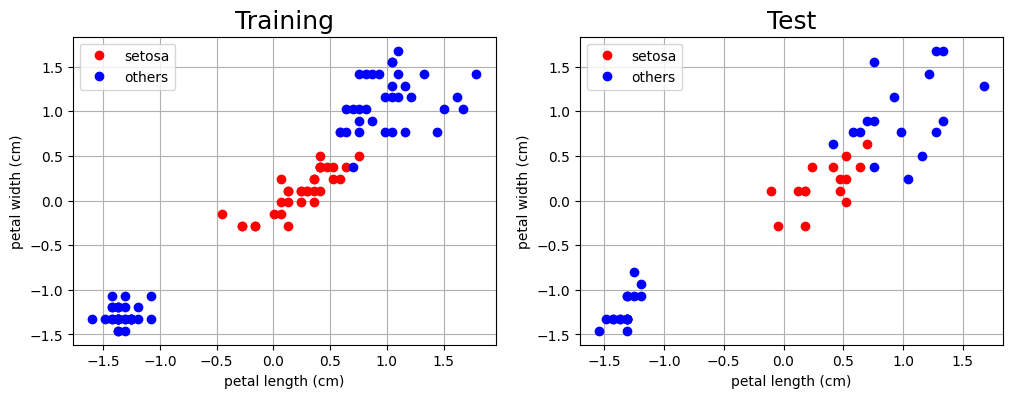

In [75]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.title("Training", size=18)
plt.plot(x_train_e2[(t_train_e2==1)[:, 0], 0], x_train_e2[(t_train_e2==1)[:, 0], 1], 'o', label=iris.target_names[0], color='red')
plt.plot(x_train_e2[(t_train_e2==0)[:, 0], 0], x_train_e2[(t_train_e2==0)[:, 0], 1], 'o', label="others", color='blue')
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.grid(True)
plt.legend(loc=2)

plt.subplot(1,2,2)
plt.title("Test", size=18)
plt.plot(x_test_e2[(t_test_e2==1)[:, 0], 0], x_test_e2[(t_test_e2==1)[:, 0], 1], 'o', label=iris.target_names[0], color='red')
plt.plot(x_test_e2[(t_test_e2==0)[:, 0], 0], x_test_e2[(t_test_e2==0)[:, 0], 1], 'o', label="others", color='blue')
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.grid(True)
plt.legend(loc=2)
plt.show()

In [76]:
# TO-DO Entrenamiento del modelo:

d = x_train_e2.shape[1]

w = np.random.randn(d, 1)
b = np.random.randn()

nepocas = 500
eta = 0.001

k = 1
loss_train = []
acc_train = []
loss_test = []
acc_test = []
for i in range(nepocas):
    z_train = np.dot(x_train_e2, w) + b
    y_train = sigmoid(z_train)

    z_test = np.dot(x_test_e2, w) + b
    y_test = sigmoid(z_test)

    # TO-DO Calcula cross-entropy y accuracy en training
    e_train = -(t_train_e2 * np.log(y_train+1e-16) + (1 - t_train_e2) * np.log(1-y_train+1e-16)).sum()
    a_train = ((y_train > 0.5) == t_train_e2).mean()

    loss_train.append(e_train)
    acc_train.append(a_train)

    # TO-DO Calcula cross-entropy y accuracy en test
    e_test =  -(t_test_e2 * np.log(y_test+1e-16) + (1 - t_test_e2) * np.log(1-y_test+1e-16)).sum()
    a_test =  ((y_test > 0.5) == t_test_e2).mean()

    loss_test.append(e_test)
    acc_test.append(a_test)

    # TO-DO Calcula los gradientes y actualiza los parametros
    dL_dz = (y_train-t_train_e2)
    dz_dw = x_train_e2
    dz_db = 1
    dL_dw = (dL_dz.T @ dz_dw).T
    dL_db = dL_dz.sum()
    b = b - eta * dL_db
    w = w - eta * dL_dw

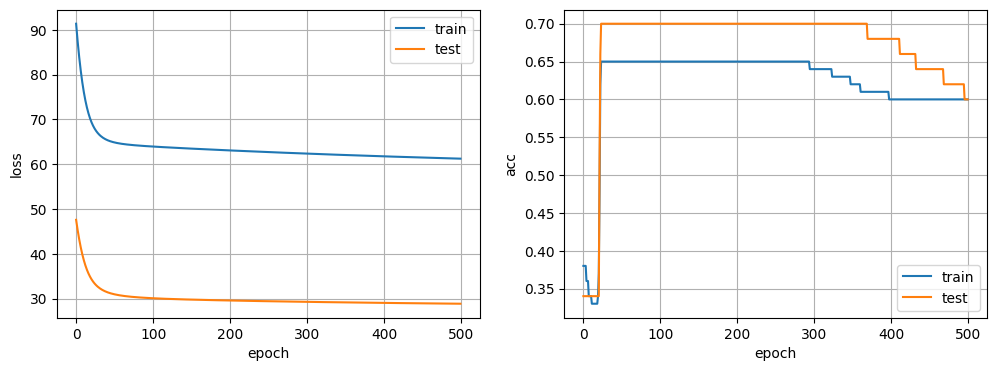

In [77]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(nepocas), loss_train, label="train")
plt.plot(range(nepocas), loss_test, label="test")
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(nepocas), acc_train, label="train")
plt.plot(range(nepocas), acc_test, label="test")
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("acc")
plt.legend()
plt.show()

In [78]:
acc_test[-1]

np.float64(0.6)

In [79]:
xx, yy = np.meshgrid(np.arange(x_train_e2[:, 0].min()-1, x_train_e2[:, 0].max()+1, 0.1),
                     np.arange(x_train_e2[:, 1].min()-1, x_train_e2[:, 1].max()+1, 0.1))
xy = np.concatenate([xx.reshape([1, -1]), yy.reshape([1, -1])],axis=0).T
xy.shape

(2808, 2)

In [80]:
z = sigmoid(xy @ w + b)
z.shape

(2808, 1)

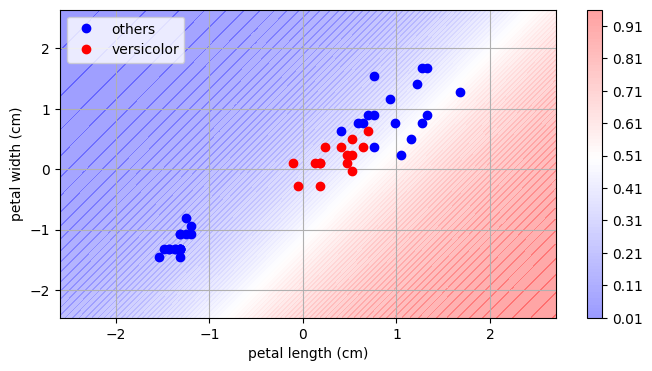

In [81]:
plt.figure(figsize=(8, 4))

plt.contourf(xx, yy, z[:, 0].reshape(xx.shape), 100, cmap="bwr", alpha=0.4, vmin=0.0, vmax=1.0)

plt.plot(x_test_e2[t_test_e2.ravel()==0, 0], x_test_e2[t_test_e2.ravel()==0, 1], 'o', label="others", color='blue')
plt.plot(x_test_e2[t_test_e2.ravel()!=0, 0], x_test_e2[t_test_e2.ravel()!=0, 1], 'o', label="versicolor", color='red')

plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.grid(True)
plt.legend(loc=2)
plt.colorbar()
plt.show()

## Ejercicio 3

Vamos a construir un modelo de regresión logística multinomial y explicarlo utilizando SKlearn. Este modelo se puede como una **red neuronal sin capas ocultas** como en el siguiente grafo.

In [82]:
from graphviz import Digraph

def draw_network(inputs, outputs):
  # Crear un grafo dirigido
  dot = Digraph(comment='Ejemplo de Grafo Dirigido')
  dot.attr(rankdir='LR')

  # Agregar nodos
  for i in range(inputs):
    dot.node("i"+str(i+1), "", shape="point", style='invis')
    dot.node('x'+str(i+1), 'x'+str(i+1))
    dot.edge("i"+str(i+1), "x"+str(i+1))

  for i in range(outputs):
    dot.node('y'+str(i+1), 'y'+str(i+1))
    dot.node("o"+str(i+1), "", shape="point", style='invis')
    dot.edge("y"+str(i+1), "o"+str(i+1))

  for i in range(inputs):
    for j in range(outputs):
      dot.edge('x'+str(i+1), 'y'+str(j+1))

  return dot

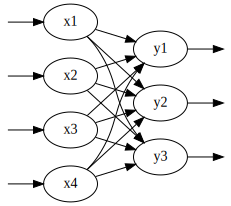

In [93]:
draw_network(4, 3)

La salida de este modelo está definida como:

$$\mathbf{z} = \mathbf{x} \mathbf{W} + \mathbf{b}$$

$$y_i = softmax_i(\mathbf{z}) = \frac{e^{z_i}}{\sum_j e^{z_j}}$$

donde $\mathbf{x}$ es el vector de atributos de entrada, $\mathbf{W}$ es la matriz de pesos que conecta la entrada con cada neurona de salida y $\mathbf{b}$ es el vector de *bias* de cada salida. Así, el vector $\mathbf{y}$ representa la probabilidad asignada del modelo a cada una de las clases.

SKlearn implementa esta regresión logística multinomial (red neuronal sin capas ocultas) por defecto. Vamos a utilizarla para resolver el problema.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [84]:
# Definición de softmax
softmax = lambda z: (np.exp(z) / np.exp(z).sum(axis=1, keepdims=True))

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
# Cargo de nuevo el dataset
iris = load_iris()
x = iris.data
t = iris.target

np.random.seed(42)
p = np.random.permutation(n)
x = x[p, :]
t = t[p]
print(x.shape, t.shape)

# Particion entrenamiento-test:
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.33, random_state=42)

# NO ME OLVIDO DE NORMALIZAR PARA EXPLICAR
medias = x_train.mean(axis=0, keepdims=True)
stds = x_train.std(axis=0, keepdims=True)
x_train = (x_train-medias)/stds
x_test = (x_test-medias)/stds

(150, 4) (150,)


In [123]:
# Voy a utilizar regularización L1 para intentar seleccionar atributos
# Ojo: solver="saga" es el único que acepta L1 como penalty en sklearn
# La penalización se introduce con un factor C, similar a las SVMs.
#   Cuanto menor es C, mayor es la regularización
lr = LogisticRegression(penalty=None, solver="saga", C=0.1)
lr.fit(x_train, t_train)
pred = lr.predict_proba(x_test)
lr.score(x_test, t_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


1.0

In [124]:
w = lr.coef_
b = lr.intercept_

In [90]:
b.shape

(3,)

In [91]:
np.isclose(softmax(x_test @ w.T + b), pred).all()

np.True_

### Hagamos selección de atributos según los pesos

Intentemos hacer selección de atributos según los pesos de la red...

Esperad. Ahora no tenemos un vector de pesos $\mathbf{w}$, sino que tenemos una matriz de pesos $\mathbf{W}$. ¿Qué hacemos?

**Podríamos intentar hacer selección de atributos según los pesos para cada clase**.

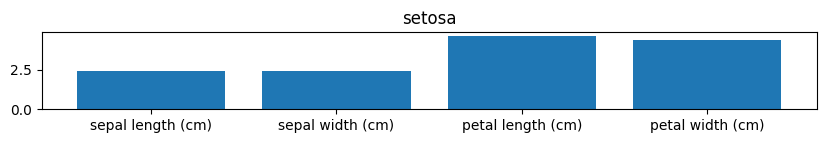

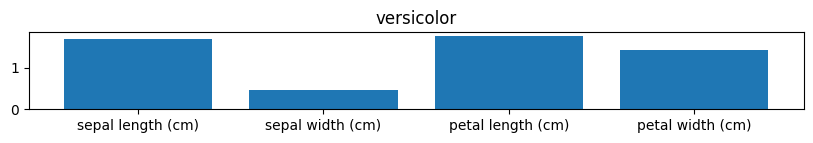

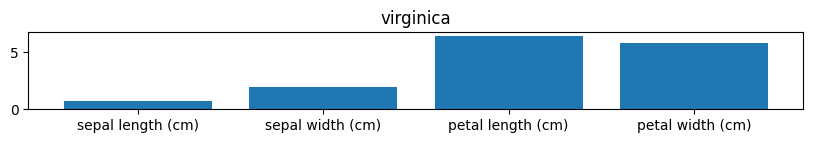

In [125]:
R = np.abs(w.T)

for c in range(3): # 3 clases
  plt.figure(figsize=(10, 1))
  plt.title(iris.target_names[c])
  plt.bar(range(len(R)), R[:, c])
  plt.xticks(range(len(R)), iris.feature_names)
  plt.show()

Como podemos ver, **si fijamos bien la regularización**, se está fijando en un atributo distinto para cada clase, y el resto de pesos los está poniendo a 0.

### Hagamos explicabilidad del modelo según la derivada

Aún no lo sabemos (*lo veremos en la próxima clase con redes neuronales con capas ocultas*), pero la derivada de un modelo de regresión logística es la misma derivada que la regresión lineal (*se están asumiendo ciertos detalles que veremos más adelante*).

Recordemos del día anterior. **¿Qué representa exactamente la derivada de una función??**

La derivada de una función $\frac{\partial L(y, t)}{\partial x_i}$ representa la tasa de cambio de la función de coste respecto a $x_i$, es decir, cómo varía la función de coste cuando varía ligeramente $x_i$.

Como ya vimos, los algoritmos de explicabilidad específica de redes neuronales se suelen basar en la técnica del gradiente respecto a los atributos de entrada (**Gradient x Input**). Si quieres explicar qué tiene que pasar en la entrada para que la predicción del modelo se acerque al valor real:

$$R_{\mathbf{x}} = - |\mathbf{x}| \cdot \nabla_\mathbf{x}L(\mathbf{y}, \mathbf{t})$$

o si quieres explicar cómo se va a comportar el modelo para cada clase:

$$R_{\mathbf{x}}^c = |\mathbf{x}| \cdot \nabla_\mathbf{x}(y_c)$$

In [126]:
def grad_x_input(x, model, t, explain_target=False):
    t = (t[:, None] == np.arange(3)[None, :])*1.0
    y = model.predict_proba(x)
    w = model.coef_
    dL_dy = (y-t)
    dy_dx = w
    dL_dx = dL_dy @ dy_dx

    if explain_target:
        R = -np.abs(x) * dL_dx
    else:
        R = np.array([np.abs(x) * dy_dx[i][None, :] for i in range(3)])
    return R

#### Explicar el comportamiento del modelo según la salida esperada

Podemos visualizar el comportamiento del modelo para analizar su salida respecto a la clase real.

In [103]:
R = grad_x_input(x_train, lr, t_train, explain_target=True)
R.shape

(100, 4)

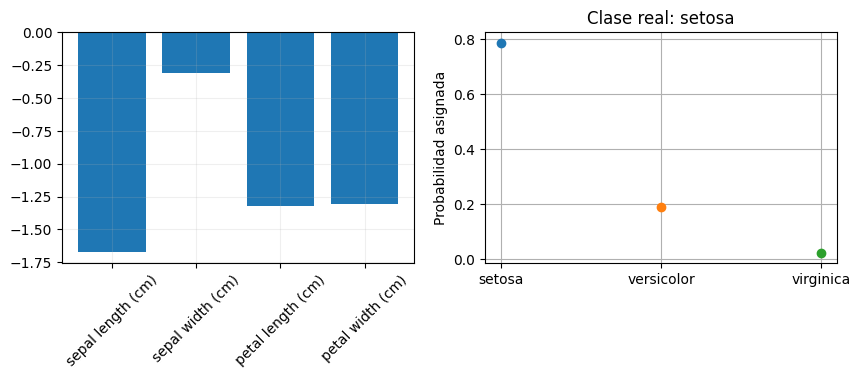

In [104]:
item = 0 # Modificar esta variable para evaluar otros ejemplos

ypred_real = lr.predict_proba(x_train[item][None, :])

plt.figure(figsize=(10, 3))
plt.subplot(1,2,1)
plt.bar(range(x_train.shape[1]), x_train[item])
plt.xticks(range(x_train.shape[1]), iris.feature_names, rotation=45)
plt.grid(alpha=0.2)
plt.subplot(1,2,2)
for c in range(3):
  plt.plot(c, ypred_real[0, c], 'o', label="Predicción "+str(iris.target_names[c]))
plt.xticks(range(3), iris.target_names)
plt.grid()
plt.title("Clase real: " + iris.target_names[t_train[item]])
plt.ylabel("Probabilidad asignada")
plt.show()

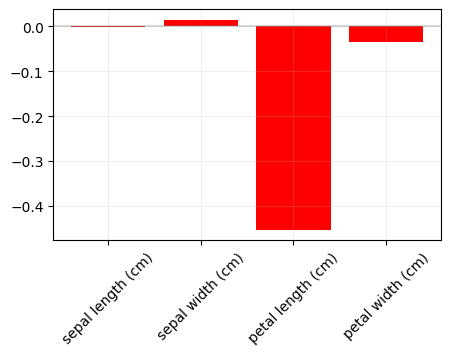

In [105]:
plt.figure(figsize=(5, 3))
plt.bar(range(x_train.shape[1]), R[item], color="red")
plt.xticks(range(x_train.shape[1]), iris.feature_names, rotation=45)
plt.grid(alpha=0.2)
plt.axhline(0.0, color="gray", alpha=0.3)
plt.show()

In [106]:
def dibuja_figura(item, x_train, x_train_modificado, ypred_real, ypred):
    plt.figure(figsize=(10, 3))
    plt.subplot(1,2,1)
    plt.bar(range(x_train.shape[1]), x_train[item], alpha=0.5)
    plt.bar(range(x_train.shape[1]), x_train_modificado, color="magenta", alpha=0.5)
    plt.xticks(range(x_train.shape[1]), iris.feature_names, rotation=45)
    plt.grid(alpha=0.2)
    plt.subplot(1,2,2)
    for c in range(3):
      plt.plot(c, ypred_real[0, c], 'o', label="Predicción real "+str(iris.target_names[c]))
      plt.plot(c, ypred[0, c], 'o', label="Predicción modificada "+str(iris.target_names[c]))
      plt.annotate('', xy=(c, ypred[0, c]), xytext=(c, ypred_real[0, c]), arrowprops=dict(arrowstyle='->', color="black"))
    plt.xticks(range(3), iris.target_names)
    plt.ylabel("Probabilidad asignada")
    plt.title("Clase real: " + iris.target_names[t_train[item]])
    plt.grid()
    plt.show()

In [107]:
def explicabilidad(item, x_train, R, model):
    print(" >> La relevancia de los atributos es la siguiente:")
    plt.figure(figsize=(5, 3))
    plt.bar(range(x_train.shape[1]), R[item], color="red")
    plt.xticks(range(x_train.shape[1]), iris.feature_names, rotation=45)
    plt.grid(alpha=0.2)
    plt.axhline(0.0, color="gray", alpha=0.3)
    plt.show()

    if (R[item] > 0).any():
      print(" >> Si disminuyo un atributo con relevancia positiva -> la probabilidad de la clase real "+str(iris.target_names[t_train[item]])+" baja")
      x_train_modificado = x_train[item].copy()
      i_columna = np.random.choice(np.where(R[item] > 0)[0])
      x_train_modificado[i_columna] = x_train_modificado[i_columna] - 0.2
      ypred = model.predict_proba(x_train_modificado[None, :])
      ypred_real = model.predict_proba(x_train[item][None, :])
      dibuja_figura(item, x_train, x_train_modificado, ypred_real, ypred)

      print(" >> Si aumento un atributo con relevancia positiva -> la probabilidad de la clase real "+str(iris.target_names[t_train[item]])+" sube")
      x_train_modificado = x_train[item].copy()
      i_columna = np.random.choice(np.where(R[item] > 0)[0])
      x_train_modificado[i_columna] = x_train_modificado[i_columna] + 0.2
      ypred = model.predict_proba(x_train_modificado[None, :])
      ypred_real = model.predict_proba(x_train[item][None, :])
      dibuja_figura(item, x_train, x_train_modificado, ypred_real, ypred)

    if (R[item] < 0).any():
      print(" >> Si disminuyo un atributo con relevancia negativa -> la probabilidad de la clase real "+str(iris.target_names[t_train[item]])+" sube")
      x_train_modificado = x_train[item].copy()
      i_columna = np.random.choice(np.where(R[item] < 0)[0])
      x_train_modificado[i_columna] = x_train_modificado[i_columna] - 0.2
      ypred = model.predict_proba(x_train_modificado[None, :])
      ypred_real = model.predict_proba(x_train[item][None, :])
      dibuja_figura(item, x_train, x_train_modificado, ypred_real, ypred)

      print(" >> Si aumento un atributo con relevancia negativa -> la probabilidad de la clase real "+str(iris.target_names[t_train[item]])+" baja")
      x_train_modificado = x_train[item].copy()
      i_columna = np.random.choice(np.where(R[item] < 0)[0])
      x_train_modificado[i_columna] = x_train_modificado[i_columna] + 0.2
      ypred = model.predict_proba(x_train_modificado[None, :])
      ypred_real = model.predict_proba(x_train[item][None, :])
      dibuja_figura(item, x_train, x_train_modificado, ypred_real, ypred)

 >> La relevancia de los atributos es la siguiente:


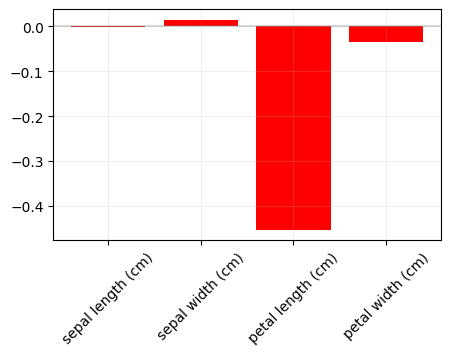

 >> Si disminuyo un atributo con relevancia positiva -> la probabilidad de la clase real setosa baja


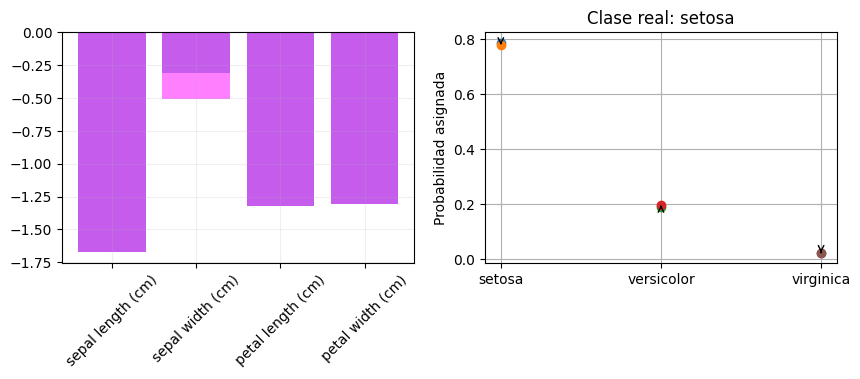

 >> Si aumento un atributo con relevancia positiva -> la probabilidad de la clase real setosa sube


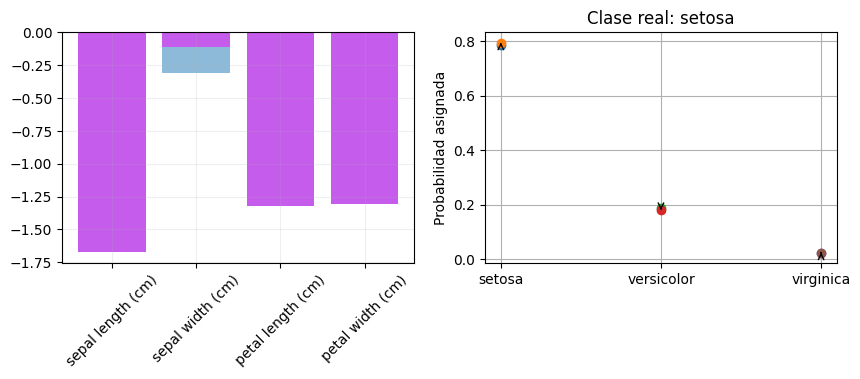

 >> Si disminuyo un atributo con relevancia negativa -> la probabilidad de la clase real setosa sube


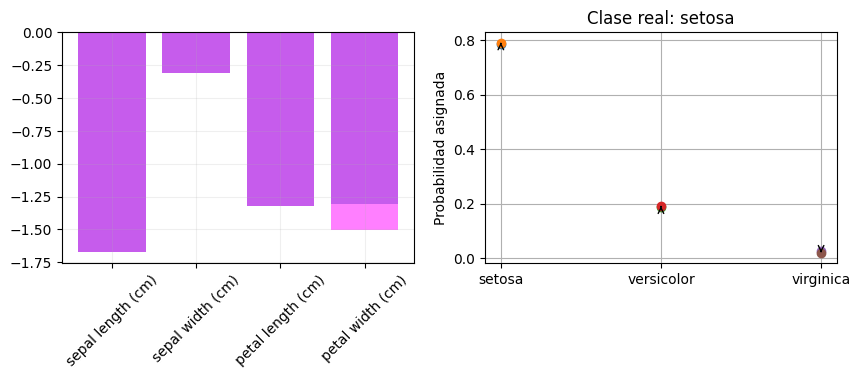

 >> Si aumento un atributo con relevancia negativa -> la probabilidad de la clase real setosa baja


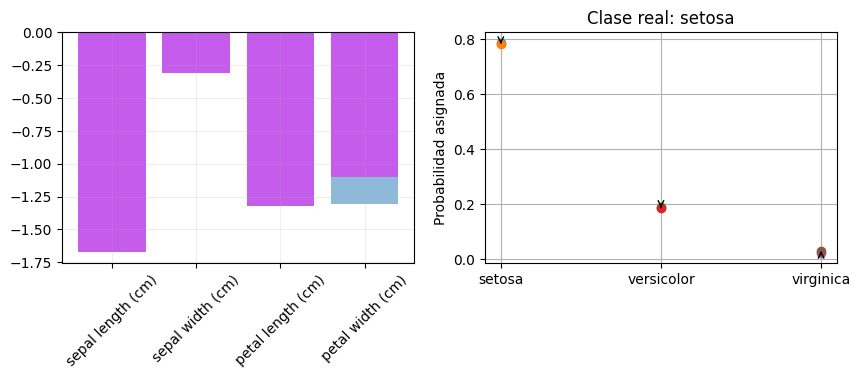

In [108]:
explicabilidad(item, x_train, R, lr)

#### Explicar la predicción de cada salida

Podemos explicar el modelo para cada salida individualmente.

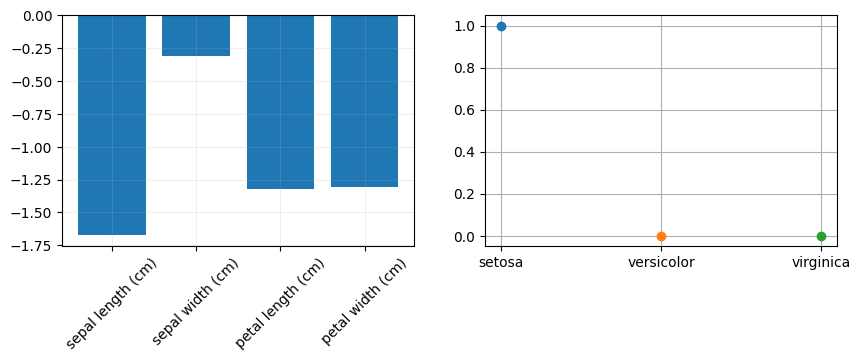

In [127]:
item = 0 # Modificar esta variable para evaluar otros ejemplos

ypred_real = lr.predict_proba(x_train[item][None, :])

plt.figure(figsize=(10, 3))
plt.subplot(1,2,1)
plt.bar(range(x_train.shape[1]), x_train[item])
plt.xticks(range(x_train.shape[1]), iris.feature_names, rotation=45)
plt.grid(alpha=0.2)
plt.subplot(1,2,2)
for c in range(3):
  plt.plot(c, ypred_real[0, c], 'o', label="Predicción "+str(iris.target_names[c]))
plt.xticks(range(3), iris.target_names)
plt.grid()
plt.show()

In [128]:
R = grad_x_input(x_train, lr, t_train, explain_target=False)
R.shape

(3, 100, 4)

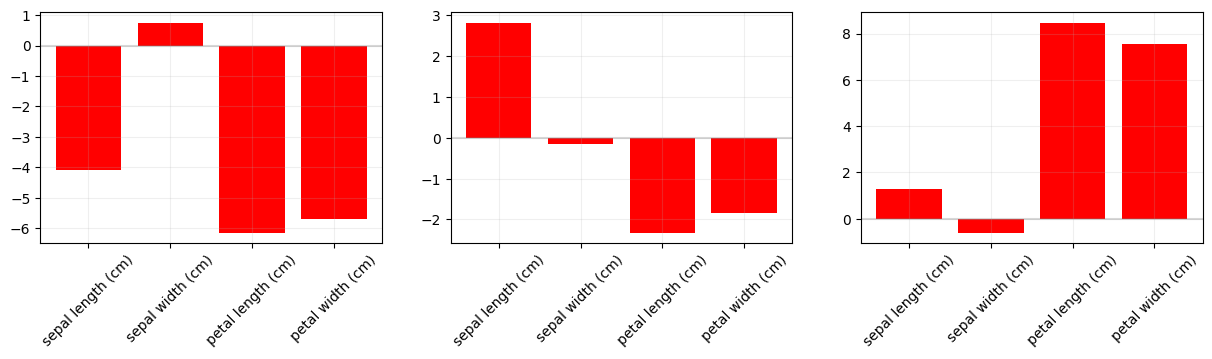

In [129]:
plt.figure(figsize=(15, 3))
for i in range(3):
  plt.subplot(1,3,i+1)
  plt.bar(range(x_train.shape[1]), R[i, item], color="red")
  plt.xticks(range(x_train.shape[1]), iris.feature_names, rotation=45)
  plt.grid(alpha=0.2)
  plt.axhline(0.0, color="gray", alpha=0.3)
plt.show()

In [130]:
def dibuja_figura(item, x_train, x_train_modificado, ypred_real, ypred):
    plt.figure(figsize=(10, 3))
    plt.subplot(1,2,1)
    plt.bar(range(x_train.shape[1]), x_train[item], alpha=0.5)
    plt.bar(range(x_train.shape[1]), x_train_modificado, color="magenta", alpha=0.5)
    plt.xticks(range(x_train.shape[1]), iris.feature_names, rotation=45)
    plt.grid(alpha=0.2)
    plt.subplot(1,2,2)
    for c in range(3):
      plt.plot(c, ypred_real[0, c], 'o', label="Predicción real "+str(iris.target_names[c]))
      plt.plot(c, ypred[0, c], 'o', label="Predicción modificada "+str(iris.target_names[c]))
      plt.annotate('', xy=(c, ypred[0, c]), xytext=(c, ypred_real[0, c]), arrowprops=dict(arrowstyle='->', color="black"))
    plt.xticks(range(3), iris.target_names)
    plt.ylabel("Probabilidad asignada")
    plt.grid()
    plt.show()

In [133]:
def explicabilidad(item, x_train, R, model, class_to_analyze):
    print(" >> VAS A EXPLICAR LA CLASE <" + iris.target_names[class_to_analyze] + ">")
    print(" >> La relevancia de los atributos es la siguiente:")
    plt.figure(figsize=(5, 3))
    plt.bar(range(x_train.shape[1]), R[class_to_analyze, item], color="red")
    plt.xticks(range(x_train.shape[1]), iris.feature_names, rotation=45)
    plt.grid(alpha=0.2)
    plt.axhline(0.0, color="gray", alpha=0.3)
    plt.show()

    if (R[class_to_analyze, item] > 0).any():
      print(" >> Si disminuyo un atributo con relevancia positiva para la clase "+str(iris.target_names[class_to_analyze])+" -> la probabilidad de la clase predicha "+str(iris.target_names[class_to_analyze])+" baja")
      x_train_modificado = x_train[item].copy()
      i_columna = np.random.choice(np.where(R[class_to_analyze, item] > 0)[0])
      x_train_modificado[i_columna] = x_train_modificado[i_columna] - 0.2
      ypred = model.predict_proba(x_train_modificado[None, :])
      ypred_real = model.predict_proba(x_train[item][None, :])
      dibuja_figura(item, x_train, x_train_modificado, ypred_real, ypred)

      print(" >> Si aumento un atributo con relevancia positiva para la clase "+str(iris.target_names[class_to_analyze])+" -> la probabilidad de la clase predicha "+str(iris.target_names[class_to_analyze])+" sube")
      x_train_modificado = x_train[item].copy()
      i_columna = np.random.choice(np.where(R[class_to_analyze, item] > 0)[0])
      x_train_modificado[i_columna] = x_train_modificado[i_columna] + 0.2
      ypred = model.predict_proba(x_train_modificado[None, :])
      ypred_real = model.predict_proba(x_train[item][None, :])
      dibuja_figura(item, x_train, x_train_modificado, ypred_real, ypred)

    if (R[class_to_analyze, item] < 0).any():
      print(" >> Si disminuyo un atributo con relevancia negativa para la clase "+str(iris.target_names[class_to_analyze])+" -> la probabilidad de la clase predicha "+str(iris.target_names[class_to_analyze])+" sube")
      x_train_modificado = x_train[item].copy()
      i_columna = np.random.choice(np.where(R[class_to_analyze, item] < 0)[0])
      x_train_modificado[i_columna] = x_train_modificado[i_columna] - 0.2
      ypred = model.predict_proba(x_train_modificado[None, :])
      ypred_real = model.predict_proba(x_train[item][None, :])
      dibuja_figura(item, x_train, x_train_modificado, ypred_real, ypred)

      print(" >> Si aumento un atributo con relevancia negativa para la clase "+str(iris.target_names[class_to_analyze])+" -> la probabilidad de la clase predicha "+str(iris.target_names[class_to_analyze])+" baja")
      x_train_modificado = x_train[item].copy()
      i_columna = np.random.choice(np.where(R[class_to_analyze, item] < 0)[0])
      x_train_modificado[i_columna] = x_train_modificado[i_columna] + 0.2
      ypred = model.predict_proba(x_train_modificado[None, :])
      ypred_real = model.predict_proba(x_train[item][None, :])
      dibuja_figura(item, x_train, x_train_modificado, ypred_real, ypred)

 >> VAS A EXPLICAR LA CLASE <virginica>
 >> La relevancia de los atributos es la siguiente:


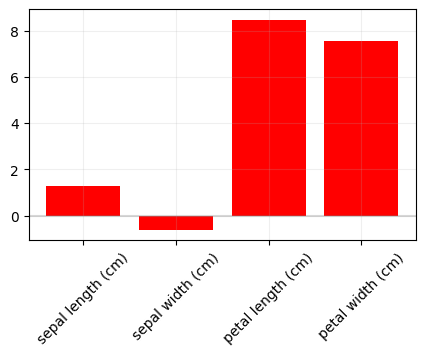

 >> Si disminuyo un atributo con relevancia positiva para la clase virginica -> la probabilidad de la clase predicha virginica baja


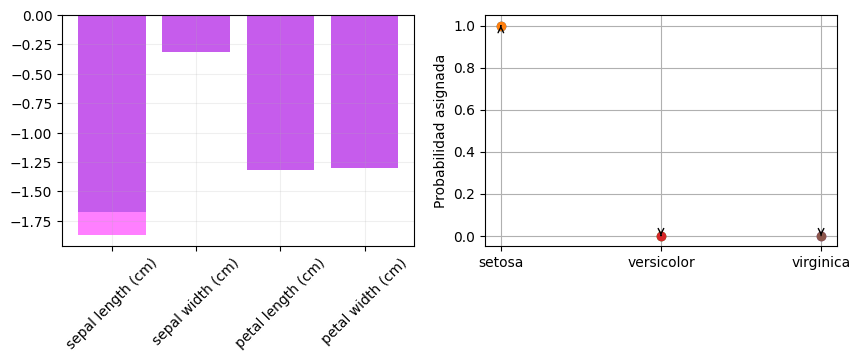

 >> Si aumento un atributo con relevancia positiva para la clase virginica -> la probabilidad de la clase predicha virginica sube


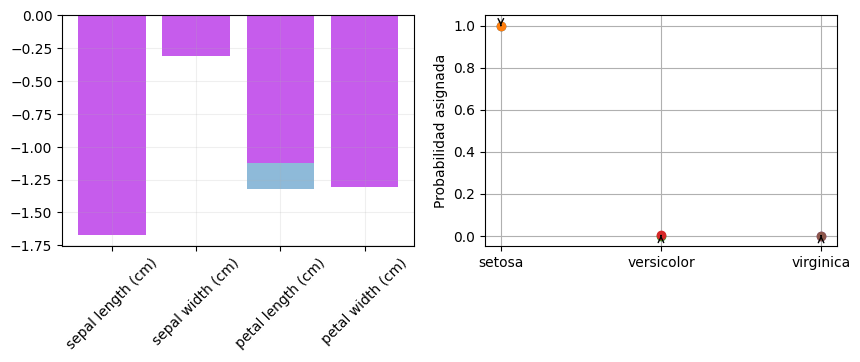

 >> Si disminuyo un atributo con relevancia negativa para la clase virginica -> la probabilidad de la clase predicha virginica sube


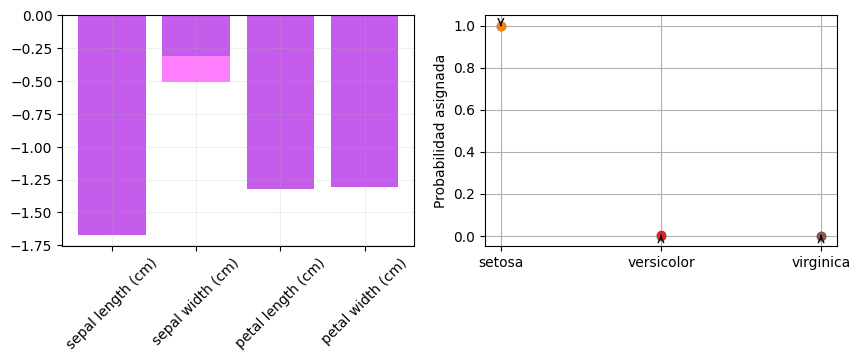

 >> Si aumento un atributo con relevancia negativa para la clase virginica -> la probabilidad de la clase predicha virginica baja


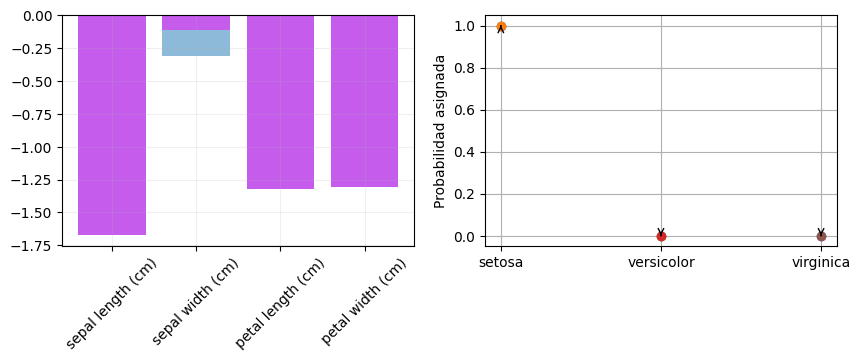

In [134]:
explicabilidad(item, x_train, R, lr, 2)